### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

In [4]:
df = pd.read_csv("loan_prediction.csv")

# eda

In [5]:
df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [6]:
df.shape # check the data dimension

(614, 13)

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.columns # check the column names for EDA

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Object type columns are:

#'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status'

In [11]:
df['Loan_ID'].nunique()

614

In [19]:
#the loan id column can be dropped since it will not benefit our analysis by applying label encoding to it
df.drop(columns='Loan_ID', axis=1, inplace = True)

In [12]:
df['Gender'].nunique()

2

In [13]:
df['Married'].nunique()

2

In [14]:
df['Dependents'].nunique()

4

In [15]:
df['Education'].nunique()

2

In [16]:
df['Self_Employed'].nunique()

2

In [17]:
df['Property_Area'].nunique()

3

In [18]:
df['Loan_Status'].nunique()

2

In [ ]:
#Changing categorical data into numeric data

In [20]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Married'] = labelencoder.fit_transform(df['Married'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['Education'] = labelencoder.fit_transform(df['Education'])
df['Self_Employed'] = labelencoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


## handle null values

In [21]:
df.isna().sum() #checked for null values, there are no null values in the dataset

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

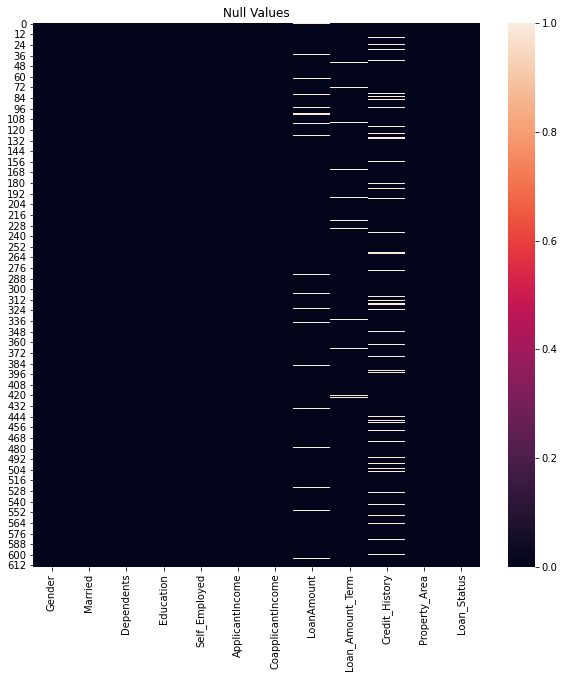

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [23]:
df = df.fillna(df.mean())

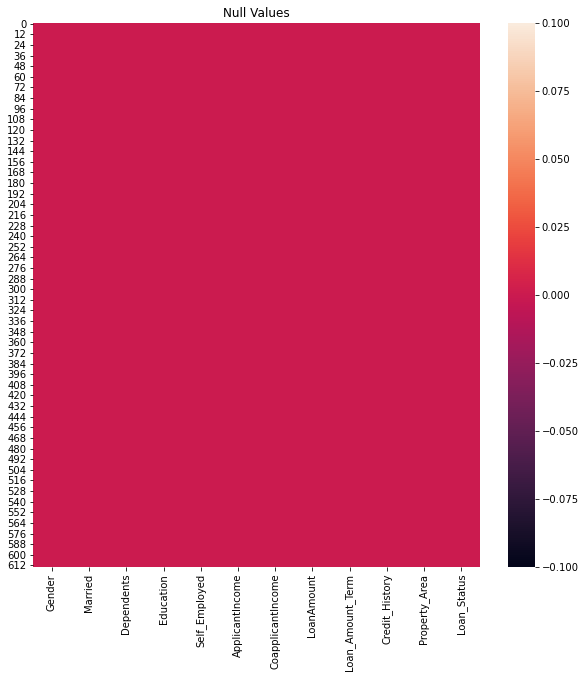

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Gender


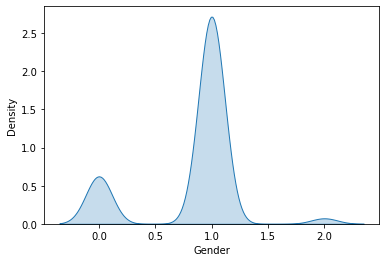

Married


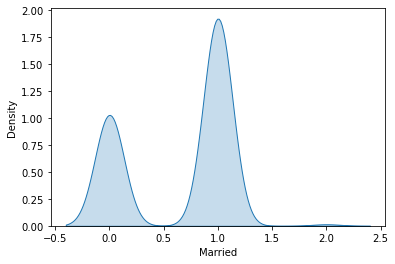

Dependents


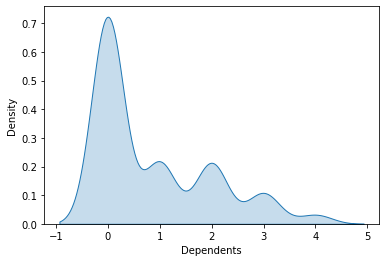

Education


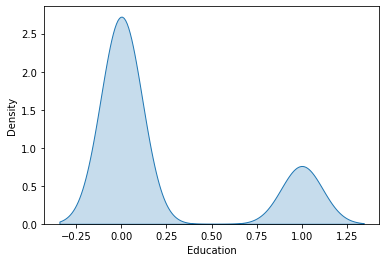

Self_Employed


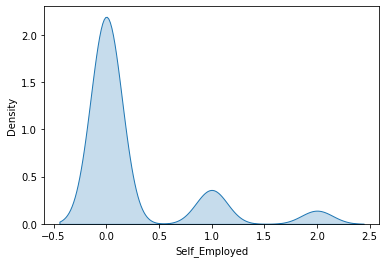

ApplicantIncome


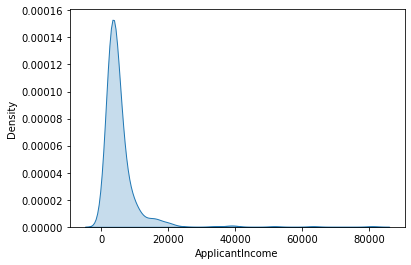

CoapplicantIncome


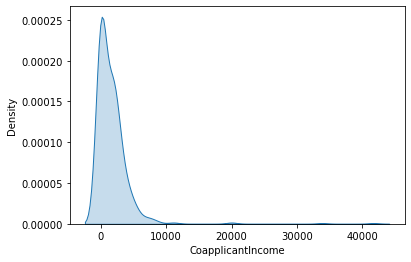

LoanAmount


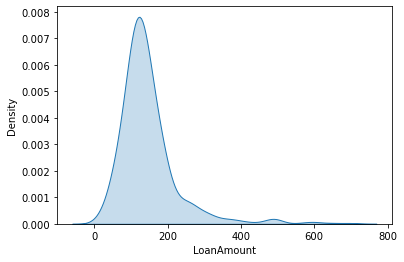

Loan_Amount_Term


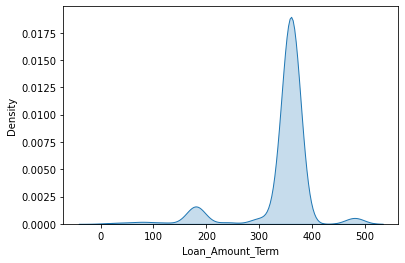

Credit_History


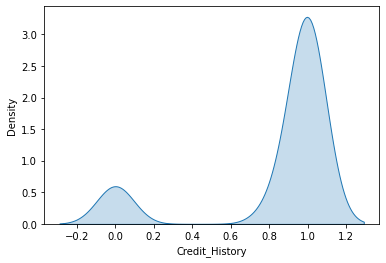

Property_Area


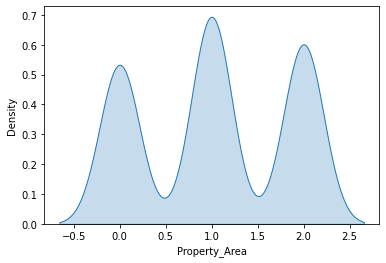

Loan_Status


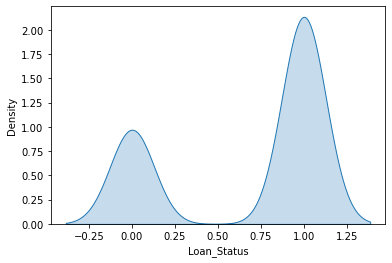

In [25]:
for col in df:
    print(col)
    
    plt.figure()
    sns.kdeplot(df[col], shade = True)
    plt.show()

In [26]:
#Dataset is imbalanced

In [27]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
pre_profile = df.profile_report(title="Loan Prediction")

In [29]:
pre_profile

## check for outliers

In [30]:
#remove outliers before skewness check and before x, y split

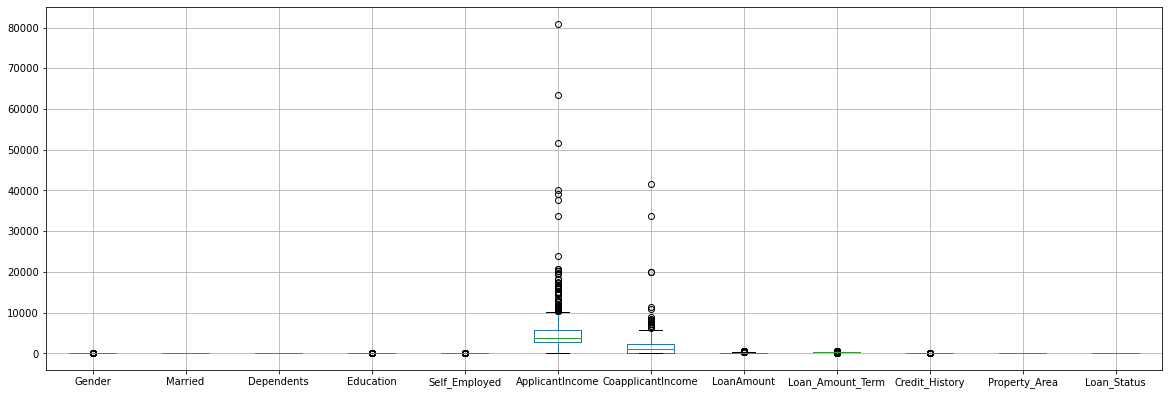

In [31]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [32]:
#Removing outliers by z score

In [33]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [34]:
new_df.shape

(548, 12)

In [35]:
df.shape

(614, 12)

In [36]:
dataloss = ((614-548)/614)*100

In [37]:
dataloss

10.749185667752444

In [38]:
#Outliers are not removed since data loss is more than 7%.

## check co-relation

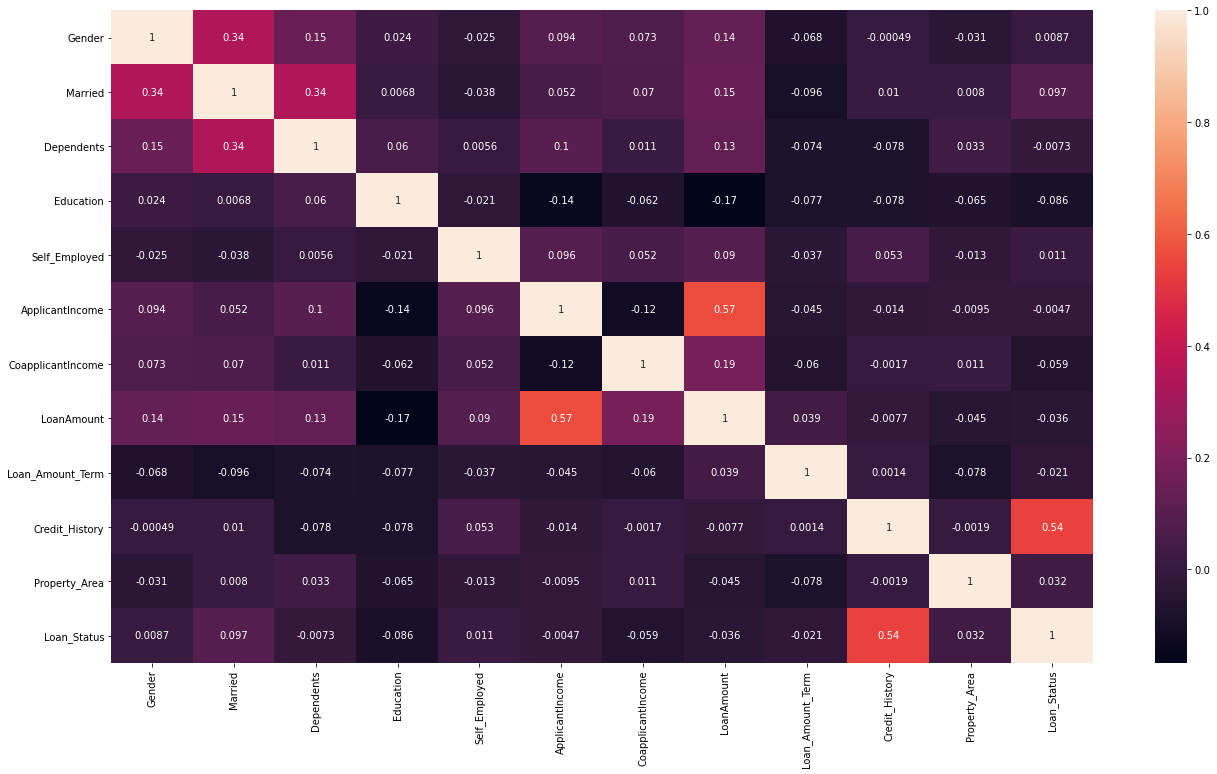

In [39]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [40]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [41]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.096657
Property_Area        0.032112
Self_Employed        0.010880
Gender               0.008690
ApplicantIncome     -0.004710
Dependents          -0.007318
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [42]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

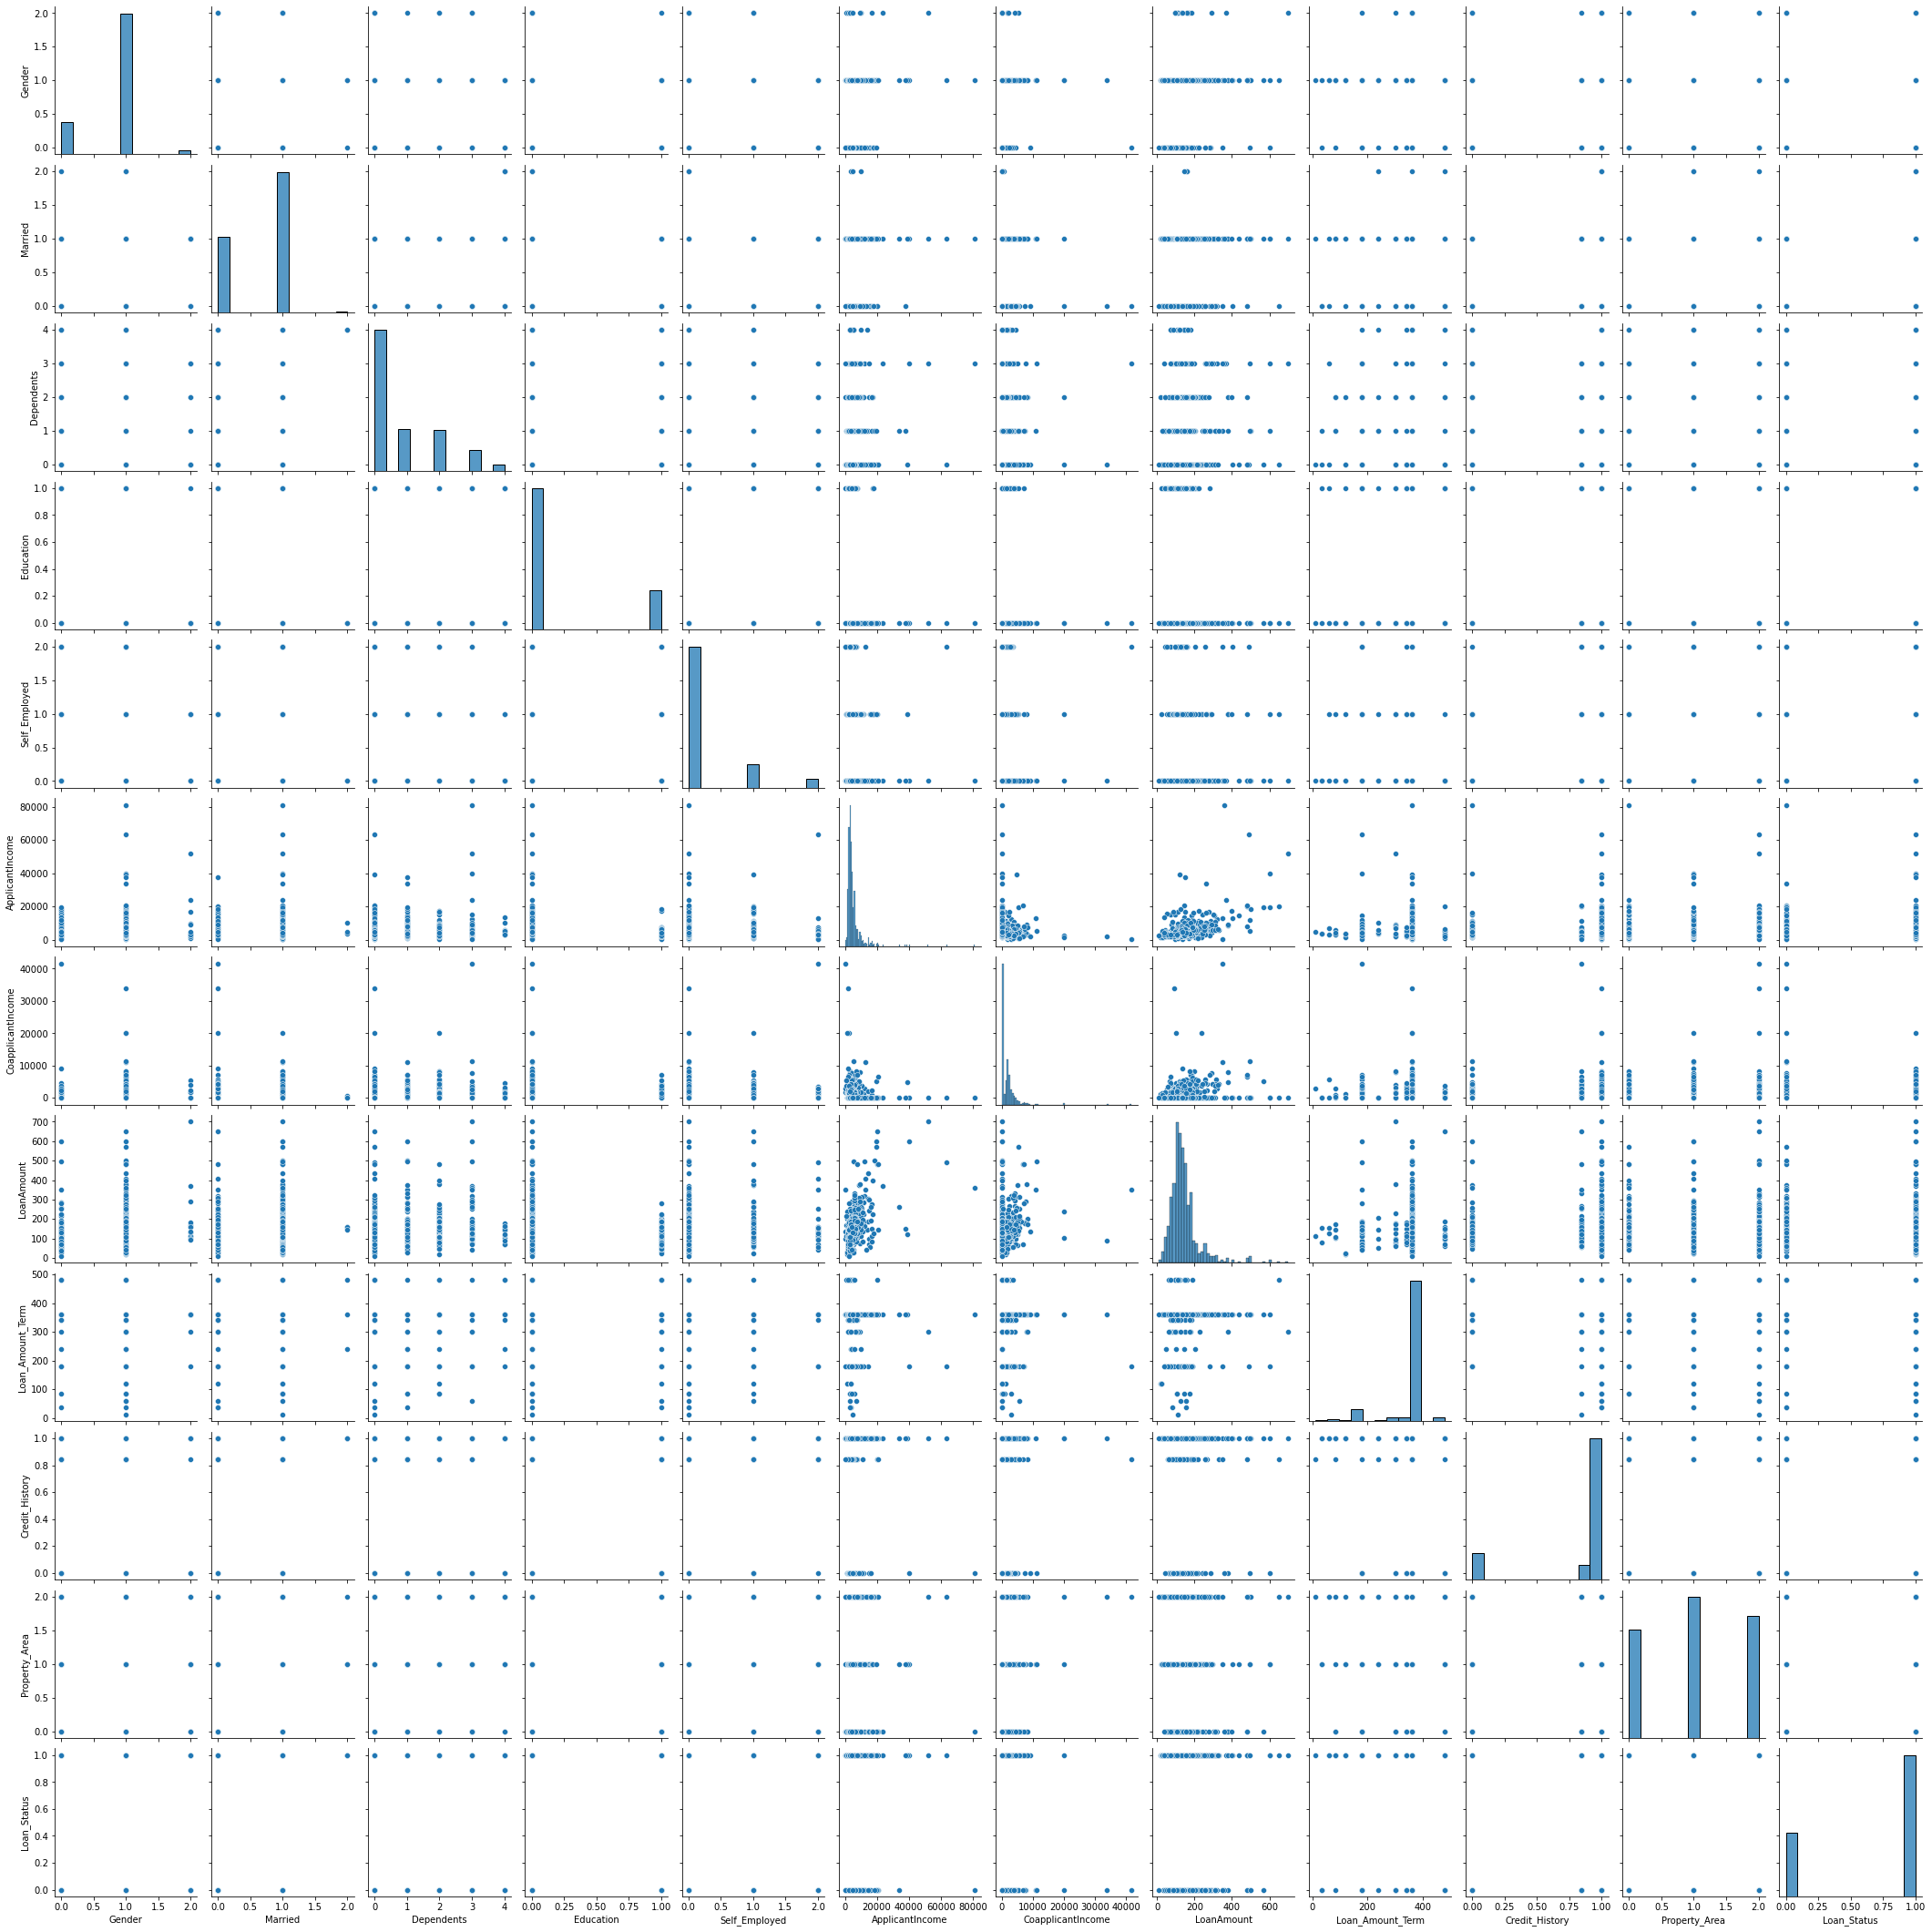

In [44]:
sns.pairplot(df[columns])

## check for skewness

In [45]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [46]:
x.skew() # check skewness

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
dtype: float64

In [47]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [48]:
df_new.skew()

Gender               0.222596
Married             -0.310754
Dependents           0.376295
Education            1.367622
Self_Employed        1.620854
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.158267
dtype: float64

In [49]:
x = df_new

## find best random state

In [50]:
#for classification problems

In [51]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test, predLR)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.8594594594594595  on Random State  158


In [52]:
#We have found the best random state. We will create our train_test_split using this random state.

## test train split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=158)

## handle data imbalance

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

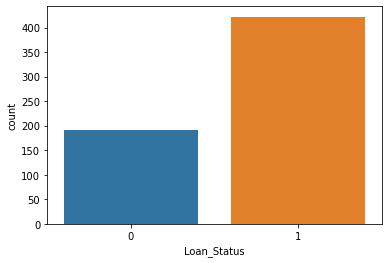

In [54]:
sns.countplot(df['Loan_Status'])

In [55]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [56]:
!pip install imbalanced_learn
!pip install delayed

In [57]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
#transform the dataset
x,y=oversample.fit_resample(x,y)

In [58]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

### classification 

In [59]:
#logistic_regression

In [60]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8594594594594595
[[ 29  22]
 [  4 130]]
              precision    recall  f1-score   support

           0       0.88      0.57      0.69        51
           1       0.86      0.97      0.91       134

    accuracy                           0.86       185
   macro avg       0.87      0.77      0.80       185
weighted avg       0.86      0.86      0.85       185



In [61]:
#support vector machines 

In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8702702702702703
[[ 28  23]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.97      0.55      0.70        51
           1       0.85      0.99      0.92       134

    accuracy                           0.87       185
   macro avg       0.91      0.77      0.81       185
weighted avg       0.88      0.87      0.86       185



In [63]:
#decisiontree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.7621621621621621
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        51
           1       0.83      0.85      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.69      0.69       185
weighted avg       0.76      0.76      0.76       185

[[ 27  24]
 [ 20 114]]


In [65]:
#random forest 

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

0.8324324324324325
              precision    recall  f1-score   support

           0       0.78      0.55      0.64        51
           1       0.85      0.94      0.89       134

    accuracy                           0.83       185
   macro avg       0.81      0.74      0.77       185
weighted avg       0.83      0.83      0.82       185

[[ 28  23]
 [  8 126]]


## check cross-validation scores

In [67]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("CrossValidation Score of LogisticRegression Model: ", scr.mean())

CrossValidation Score of LogisticRegression Model:  0.6966962524654833


In [68]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("CrossValidation Score of DecisionTree Model: ", scr.mean())

CrossValidation Score of DecisionTree Model:  0.7725767821921667


In [69]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("CrossValidation Score of RandomForest Model: ", scr.mean())

CrossValidation Score of RandomForest Model:  0.8330374753451677


In [70]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc, x, y, cv=5)
print("CrossValidation Score of SVC Model: ", scr.mean())

CrossValidation Score of SVC Model:  0.7311143984220906


In [71]:
#Model with least difference between Model accuracy and cross validation is selected as the best model
#LR -> 
85.9 - 69.6

16.30000000000001

In [72]:
# SVM -> 
87 -83.3

3.700000000000003

In [73]:
# DT -> 
76.2 - 77.2

-1.0

In [74]:
# RF -> 
83.2 - 73.1

10.100000000000009

## hyper parameter tuning

In [75]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 25  26]
 [  0 134]]
0.8594594594594595
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.84      1.00      0.91       134

    accuracy                           0.86       185
   macro avg       0.92      0.75      0.78       185
weighted avg       0.88      0.86      0.84       185



In [76]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [77]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [78]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [79]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [80]:
best_random_grid=rf_randomcv.best_estimator_

In [81]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 25  26]
 [  0 134]]
Accuracy Score 0.8594594594594595
Classification report:               precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.84      1.00      0.91       134

    accuracy                           0.86       185
   macro avg       0.92      0.75      0.78       185
weighted avg       0.88      0.86      0.84       185



## Grid Search CV

In [82]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [84]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [85]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=120, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=1200)

In [86]:
best_grid=grid_search.best_estimator_

In [87]:
best_grid

RandomForestClassifier(max_depth=120, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=1200)

In [88]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 25  26]
 [  0 134]]
Accuracy Score 0.8594594594594595
Classification report:               precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.84      1.00      0.91       134

    accuracy                           0.86       185
   macro avg       0.92      0.75      0.78       185
weighted avg       0.88      0.86      0.84       185



## saving the model

In [ ]:
import joblib
joblib.dump(best_grid, "model.pkl") #rename as per project name
prediction = model.predict(x_test)